<a href="https://colab.research.google.com/github/KacperKaszuba0608/Projects-R/blob/main/Creating_An_Efficient_Data_Analysis_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating An Efficient Data Analysis Workflow

## Introdution

This project will be about analysis of data for a company that sells books for learning programming. This company has produced multiple books, and each has received many reviews. The company wants us to check out the sales data and see if we can extract any useful information from it.

## Loading Libraries and Reading in Dataset

In [ ]:
library(tidyverse)
library(ggplot2)

# Reading in dataset in csv file
df <- read_csv('https://raw.githubusercontent.com/KacperKaszuba0608/Datasets/main/book_reviews.csv')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 2000 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): book, review, state
dbl (1): price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Getting informations about data

In [ ]:
# Showing first five rows
head(df)

book,review,state,price
<chr>,<chr>,<chr>,<dbl>
R Made Easy,Excellent,TX,19.99
R For Dummies,Fair,NY,15.99
R Made Easy,Excellent,NY,19.99
R Made Easy,Poor,FL,19.99
Secrets Of R For Advanced Students,Great,Texas,50.00
R Made Easy,NA,California,19.99


In [ ]:
# Extarcting number of rows and columns
dim(df)

[1] 2000    4

In [ ]:
# Extracting some informations about data with examples
glimpse(df)

Rows: 2,000
Columns: 4
$ book   <chr> "R Made Easy", "R For Dummies", "R Made Easy", "R Made Easy", "…
$ review <chr> "Excellent", "Fair", "Excellent", "Poor", "Great", NA, "Great",…
$ state  <chr> "TX", "NY", "NY", "FL", "Texas", "California", "Florida", "CA",…
$ price  <dbl> 19.99, 15.99, 19.99, 19.99, 50.00, 19.99, 19.99, 19.99, 29.99, …


In [ ]:
# Summary of data
summary(df)

     book              review             state               price      
 Length:2000        Length:2000        Length:2000        Min.   :15.99  
 Class :character   Class :character   Class :character   1st Qu.:19.99  
 Mode  :character   Mode  :character   Mode  :character   Median :29.99  
                                                          Mean   :31.29  
                                                          3rd Qu.:39.99  
                                                          Max.   :50.00  

As we see in above results we have 2000 rows and 4 columns in our dataset. First 3 columns are character type and last one is numeric. We have some NA values. Minimum price in last column is 15.99\$ and maximum is 50.00\$. Median of all values equals 29.99\$ and mean 31.29\$. 25% of values are greater than 19.99\$ and 75% values are less than 39.99\$.

The columns are named as follows:

1. book - name of a book
2. review - column contains score of a book
3. state - contains name or short name of state in USA
4. price - price of each book

In [ ]:
# Taking unique values of each column
names <- colnames(df)

map(df[names], unique)

$book
[1] "R Made Easy"                        "R For Dummies"                     
[3] "Secrets Of R For Advanced Students" "Top 10 Mistakes R Beginners Make"  
[5] "Fundamentals of R For Beginners"   

$review
[1] "Excellent" "Fair"      "Poor"      "Great"     NA          "Good"     

$state
[1] "TX"         "NY"         "FL"         "Texas"      "California"
[6] "Florida"    "CA"         "New York"  

$price
[1] 19.99 15.99 50.00 29.99 39.99

|   |   |
|:---|:---|
|**book column**| "R Made Easy", "R For Dummies", "Secrets Of R For Advanced Students", "Top 10 Mistakes R Beginners Make", "Fundamentals of R For Beginners" |
|**review column**| Excellent, Fair, Poor, Great, Good, NA value |
|**state column**|TX, NY, FL, CA, Texas, California, Florida, New York |
|**price column**|19.99, 15.99, 50.00, 29.99, 39.99|

## Cleaning data

### Handling Missing Data

As we see above column `review` has some missing values called `NA`. I will remove them, because I want to have clean dataset without the missing values.

In [ ]:
# Filtering data
df <- df %>%
  filter(!(is.na(review)))

map(df['review'], unique)

$review
[1] "Excellent" "Fair"      "Poor"      "Great"     "Good"

After filter I don't have NA values and I can start my analysis. Now, our data have 1794 rows and still 4 columns. 

### Dealing With Inconsistent Labels in `state` column

In state column we have values with the same mining. For example `CA` and `California`. It means the same thing, but first is postal code, second is full name of state. Below I change all full names to postal code.

In [ ]:
# Changing state name to postal code
df <- df %>%
  mutate(state = case_when(state == 'California' ~ 'CA',
                           state == 'Texas' ~ 'TX',
                           state == 'New York' ~ 'NY',
                           state == 'Florida' ~ 'FL',
                           TRUE ~ state))

head(df)

book,review,state,price
<chr>,<chr>,<chr>,<dbl>
R Made Easy,Excellent,TX,19.99
R For Dummies,Fair,NY,15.99
R Made Easy,Excellent,NY,19.99
R Made Easy,Poor,FL,19.99
Secrets Of R For Advanced Students,Great,TX,50.00
R Made Easy,Great,FL,19.99


### Transforming The Review Data

In this part I decided to change values in `review` column from character to numeric. I have adopted the following coding:

* "Poor" has score" `1`
* "Fair" has score: `2`
* "Good" has score: `3`
* "Great" has score: `4`
* "Excellent" has score: `5`

Then I add new column named `high_review` which will contain `TRUE` value if score is greater or queal to 4 and `FALSE` when score is less than 4.


In [ ]:
# Coding review column and adding new high_review
df <- df %>%
  mutate(review = case_when(review == 'Poor' ~ 1,
                   review == 'Fair' ~ 2,
                   review == 'Good' ~ 3,
                   review == 'Great' ~ 4,
                   review == 'Excellent' ~ 5,),
         high_review = ifelse(review >= 4, TRUE, FALSE))

head(df)

book,review,state,price,high_review
<chr>,<dbl>,<chr>,<dbl>,<lgl>
R Made Easy,5,TX,19.99,TRUE
R For Dummies,2,NY,15.99,FALSE
R Made Easy,5,NY,19.99,TRUE
R Made Easy,1,FL,19.99,FALSE
Secrets Of R For Advanced Students,4,TX,50.00,TRUE
R Made Easy,4,FL,19.99,TRUE


## Analyzing The Data

After data cleaning, I'm ready to do some analysis of the data. My main goal is to figure out what book is the most profitable. How I will do this? I can calculate which book purchased the most or how much money each book generates for company. I will show some basic statistic which will answer the question and some visualization to show you in more pleasing to the eye.

In [ ]:
# Calculating sum of books sold and sum of money from sale
most_profitable <- df %>%
  group_by(book) %>%
  summarize(books_sold = table(book),
            money = sum(price)) %>%
  arrange(-money) %>%
  mutate(rank = c(1,2,3,4,5))

most_profitable

book,books_sold,money,rank
<chr>,<table[1d]>,<dbl>,<dbl>
Secrets Of R For Advanced Students,360,18000.00,1
Fundamentals of R For Beginners,366,14636.34,2
Top 10 Mistakes R Beginners Make,355,10646.45,3
R Made Easy,352,7036.48,4
R For Dummies,361,5772.39,5


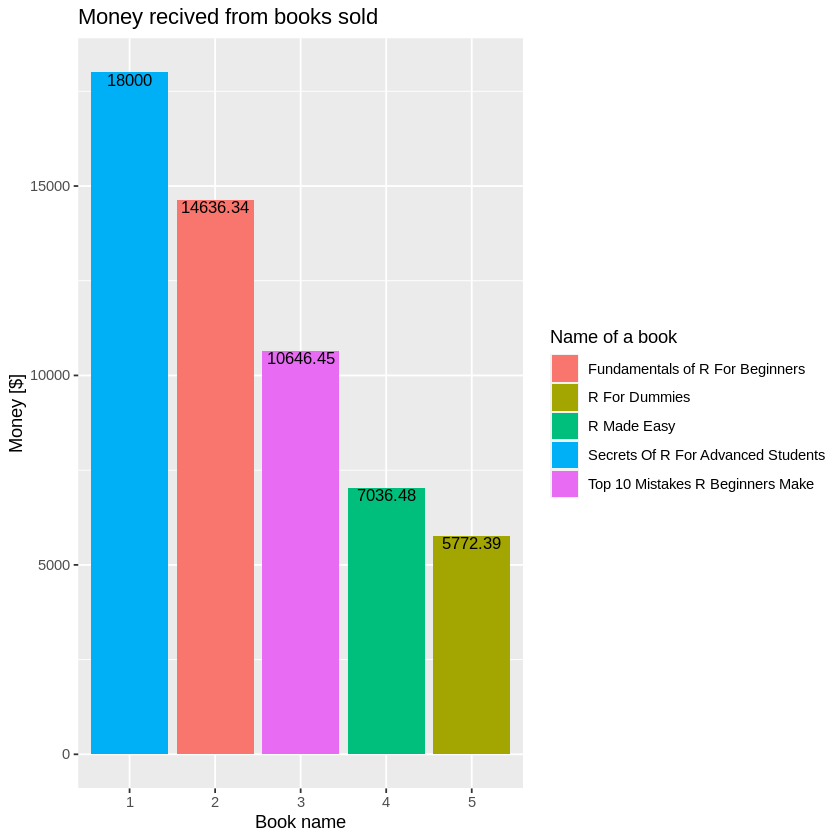

In [ ]:
# Visualization of received results
ggplot(data = most_profitable, aes(x = reorder(rank, -money), y = money, fill = book))+
  geom_col() + 
  geom_text(aes(label = money), vjust = 1.1, size = 3.5)+
  ylab('Money [$]')+
  xlab('Book name')+
  ggtitle('Money recived from books sold')+
  labs(fill='Name of a book')

Above results shows us that the most profitable book was "Secrets Of R For Advanced Students" and ranking is as follows:

1. "Secrets Of R For Advanced Students"
2. "Fundamentals of R For Beginners"
3. "Top 10 Mistakes R Beginners Make"
4. "R Made Easy"
5. "R For Dummies"


### Relationship between State and the Books

Now I focus on question: Is there any relationship between state and the books purchased there? Maybe some states have more interest in some books over others. Thanks to this knowledge company will knows, where sholud sell which book.

In [ ]:
table(df$book, df$state)

                                    
                                      CA  FL  NY  TX
  Fundamentals of R For Beginners     99  74  97  96
  R For Dummies                      120  77  81  83
  R Made Easy                         84  85  96  87
  Secrets Of R For Advanced Students  84  86 108  82
  Top 10 Mistakes R Beginners Make    77  84 102  92

Table above shows us little ralationship between state and the books. Namely:

* In California the most often purchased book was "R For Dummies". Up to 120 times.
* In Florida all books have a similar number of purchased books but 2 of them were purchesed less than 80 times.
* In New York people bought most often "Secrets of R For Advanced Students" and "Top 10 Mistakes R Beginners Make". Over 100 times.
* In Texas we have the same result like in Florida but here the number of books sold is greater.

Below we have visualization of results from table.

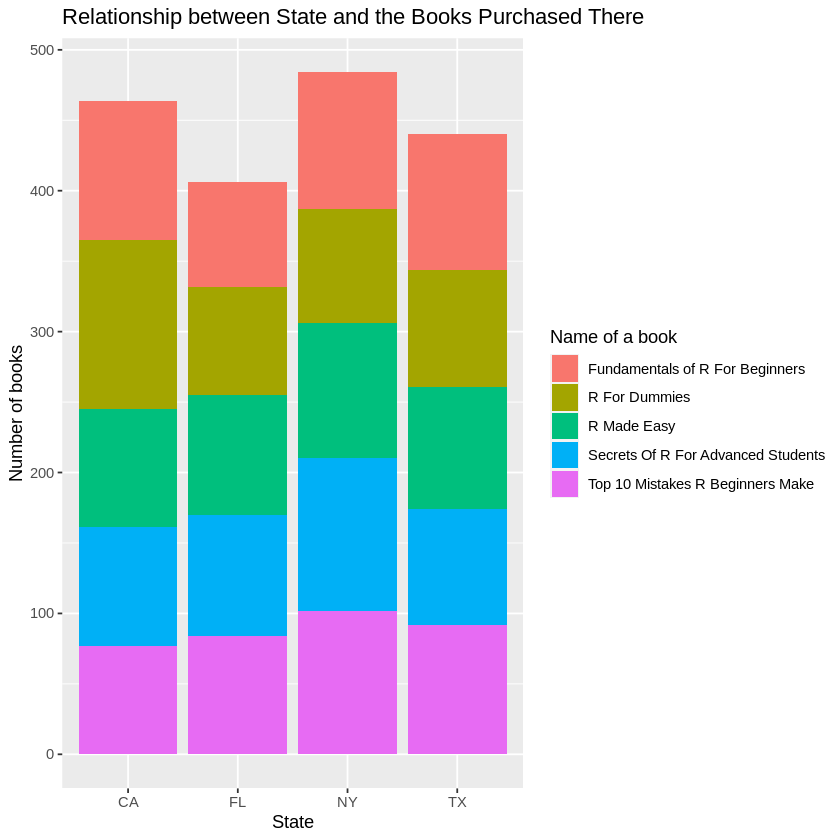

In [ ]:
all_states <- ggplot(data = df, aes(x = state, fill = book))+
                geom_bar()+
                xlab('State')+
                ylab('Number of books')+
                ggtitle('Relationship between State and the Books Purchased There')+
                labs(fill='Name of a book')
all_states